<a href="https://colab.research.google.com/github/Yedramartinolmos/deeplearning/blob/main/Ejercicio_Regularizadores_Yedra_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]




In [5]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

  model = models.Sequential()

  if regularizador == 0:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  
  elif regularizador == 1:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador == 2:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador == 3:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador ==4:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dropout(0.5))
  

  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

  else: 
    print('Error el numero debe estar entre 0-4')
    return #cuidado con los indents
  model.add(layers.Dense(10, activation = 'softmax'))
  model.summary()
  return model


In [6]:
def compila_modelo(model): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

In [7]:
def entrena_modelo(model):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history = model.fit(train_images,train_labels,
                    batch_size=128,
                    epochs=30, validation_data=(validation_images, validation_labels))
  return history


In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [10]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
print(network0)

In [12]:
network0 = compila_modelo(network0)

In [13]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 7s 8ms/step - loss: 0.2870 - accuracy: 0.9163 - val_loss: 0.1348 - val_accuracy: 0.9634
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.1162 - accuracy: 0.9665 - val_loss: 0.1065 - val_accuracy: 0.9700
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0759 - accuracy: 0.9774 - val_loss: 0.0913 - val_accuracy: 0.9726
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0541 - accuracy: 0.9839 - val_loss: 0.0906 - val_accuracy: 0.9741
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0412 - accuracy: 0.9877 - val_loss: 0.0754 - val_accuracy: 0.9777
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0738 - val_accuracy: 0.9788
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0235 - accuracy: 0.9932 - val_loss: 0.0740 - val_accuracy: 0.9796
Epoch 

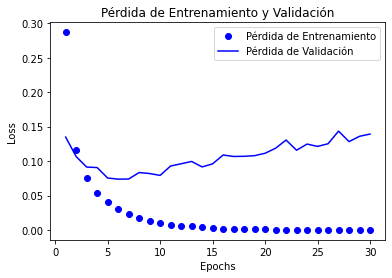

In [14]:
pinta_perdida_entrenamiento_validacion(historia0)

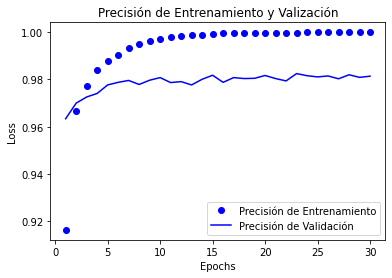

In [15]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [16]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
network1 = compila_modelo(network1)

In [18]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1466 - accuracy: 0.8446 - val_loss: 1.0566 - val_accuracy: 0.8705
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9619 - accuracy: 0.8814 - val_loss: 0.8458 - val_accuracy: 0.9149
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8350 - accuracy: 0.9031 - val_loss: 0.7487 - val_accuracy: 0.9296
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7615 - accuracy: 0.9172 - val_loss: 0.7855 - val_accuracy: 0.9027
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7118 - accuracy: 0.9238 - val_loss: 0.6746 - val_accuracy: 0.9351
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6773 - accuracy: 0.9296 - val_loss: 0.6451 - val_accuracy: 0.9346
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6506 - accuracy: 0.9331 - val_loss: 0.6237 - val_accuracy: 0.9440
Epoch 

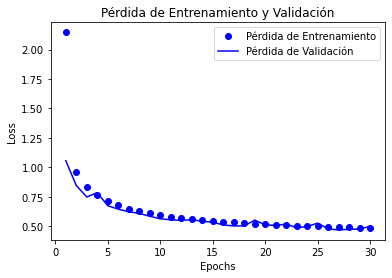

In [19]:
pinta_perdida_entrenamiento_validacion(historia1)

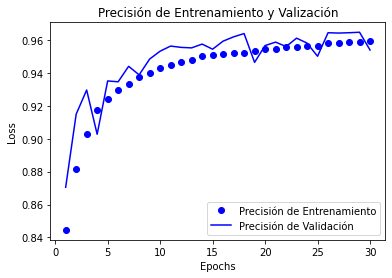

In [20]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [21]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
network2 = compila_modelo(network2)

In [23]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5250 - accuracy: 0.9126 - val_loss: 0.3012 - val_accuracy: 0.9520
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2633 - accuracy: 0.9540 - val_loss: 0.2317 - val_accuracy: 0.9600
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2094 - accuracy: 0.9635 - val_loss: 0.1895 - val_accuracy: 0.9684
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1872 - accuracy: 0.9664 - val_loss: 0.1790 - val_accuracy: 0.9712
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1729 - accuracy: 0.9699 - val_loss: 0.1982 - val_accuracy: 0.9623
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1633 - accuracy: 0.9721 - val_loss: 0.1585 - val_accuracy: 0.9719
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1572 - accuracy: 0.9725 - val_loss: 0.1544 - val_accuracy: 0.9766
Epoch 

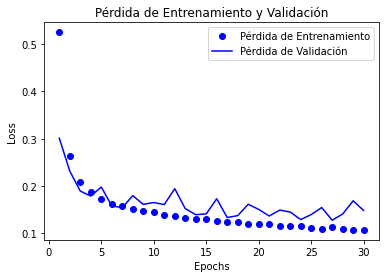

In [24]:
pinta_perdida_entrenamiento_validacion(historia2)

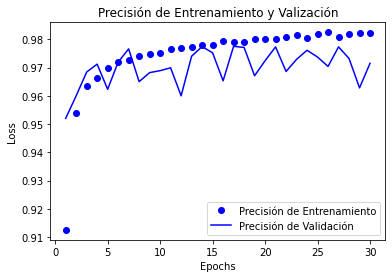

In [25]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [26]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
network3 = compila_modelo(network3)

In [28]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1637 - accuracy: 0.8418 - val_loss: 1.0822 - val_accuracy: 0.8573
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9787 - accuracy: 0.8781 - val_loss: 0.8926 - val_accuracy: 0.9012
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8565 - accuracy: 0.8996 - val_loss: 0.8247 - val_accuracy: 0.9089
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7828 - accuracy: 0.9124 - val_loss: 0.7276 - val_accuracy: 0.9288
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7330 - accuracy: 0.9201 - val_loss: 0.6828 - val_accuracy: 0.9338
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6975 - accuracy: 0.9266 - val_loss: 0.6616 - val_accuracy: 0.9384
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6693 - accuracy: 0.9314 - val_loss: 0.6253 - val_accuracy: 0.9420
Epoch 

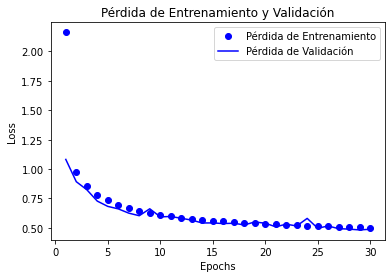

In [29]:
pinta_perdida_entrenamiento_validacion(historia3)

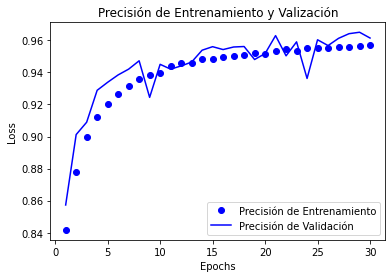

In [30]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [31]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [32]:
network4 = compila_modelo(network4)

In [33]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3492 - accuracy: 0.8960 - val_loss: 0.1623 - val_accuracy: 0.9547
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1712 - accuracy: 0.9491 - val_loss: 0.1188 - val_accuracy: 0.9662
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1315 - accuracy: 0.9612 - val_loss: 0.0994 - val_accuracy: 0.9725
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1089 - accuracy: 0.9675 - val_loss: 0.0894 - val_accuracy: 0.9748
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0958 - accuracy: 0.9716 - val_loss: 0.0855 - val_accuracy: 0.9769
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9749 - val_loss: 0.0814 - val_accuracy: 0.9774
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0774 - accuracy: 0.9763 - val_loss: 0.0827 - val_accuracy: 0.9776
Epoch 

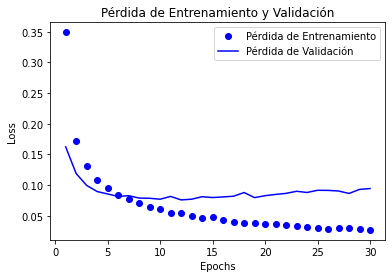

In [34]:
pinta_perdida_entrenamiento_validacion(historia4)

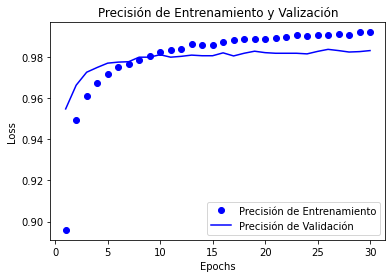

In [35]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [36]:
network5 = crea_modelo(5)

Error el numero debe estar entre 0-4


### CONCLUSIONES

Comparemos el resultado ... segun el regularizador que se le aplica a ...

¿Qué es la regularización?

La regularización en una red neuronal es una técnica que podemos utilizar para reducir el sobreajuste en nuestro modelo de red neuronal con el objetivo final de optimizar este mismo.


*   Caso 0 (Sin Regulizadores)
*   Caso 1 (Regularizador l1)
*   Caso 2 (Regularizador l2)
*   Caso 3 (Regularizador l1_l2
*   Caso 4 (Usando Dropout)


